In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [10]:
df = pd.read_csv('ipl_2025_auction_players.csv')

In [12]:
df

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35
...,...,...,...,...,...
618,Vijay Yadav,-,AR,0.30,TBA
619,Jofra Archer,RR,BOWL,2.00,12.50
620,Saurabh Netravalkar,-,BOWL,0.30,TBA
621,Hardik Tamore,-,WK,0.30,TBA


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


In [14]:
# Display the first few rows of the dataset
print(df.head())

            Players Team  Type Base   Sold
0       Virat Kohli  RCB   BAT    -  21.00
1     Rajat Patidar  RCB   BAT    -  11.00
2        Yash Dayal  RCB  BOWL    -   5.00
3    Jasprit Bumrah   MI  BOWL    -  18.00
4  Suryakumar Yadav   MI   BAT    -  16.35


# DATA CLEANING

In [16]:
# Check for missing values
print(df.isnull().sum())

Players    0
Team       0
Type       0
Base       0
Sold       0
dtype: int64


In [24]:
# Drop rows with missing values (if any)
df = df.dropna()
df

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35
...,...,...,...,...,...
618,Vijay Yadav,-,AR,0.30,TBA
619,Jofra Archer,RR,BOWL,2.00,12.50
620,Saurabh Netravalkar,-,BOWL,0.30,TBA
621,Hardik Tamore,-,WK,0.30,TBA


In [26]:
# Check for duplicates
print(df.duplicated().sum())

2


In [30]:
# Drop duplicates if any
df = df.drop_duplicates()


,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35
...,...,...,...,...,...
617,Tripuresh Singh,-,AR,0.30,TBA
618,Vijay Yadav,-,AR,0.30,TBA
619,Jofra Archer,RR,BOWL,2.00,12.50
620,Saurabh Netravalkar,-,BOWL,0.30,TBA


In [32]:
# Ensure proper data types
df['Base'] = pd.to_numeric(df['Base'], errors='coerce')
df['Sold'] = pd.to_numeric(df['Sold'], errors='coerce')

In [34]:
# summary statistics for base price and sold price
print(df[['Base', 'Sold']].describe())

             Base        Sold
count  575.000000  227.000000
mean     0.731826    5.207489
std      0.612177    6.028455
min      0.300000    0.300000
25%      0.300000    0.750000
50%      0.300000    2.400000
75%      1.000000    8.875000
max      2.000000   27.000000


In [151]:
# Count the number of unique teams in the dataset
num_teams = df['Team'].nunique()

In [153]:
# Print the result
print(f'Number of unique IPL teams: {num_teams}')

Number of unique IPL teams: 11


In [190]:

team_colors = {
    'CSK': 'yellow',
    'RCB': 'red',
    'MI': 'blue',
    'KKR': 'purple',
    'RR': 'pink',
    'DC': 'lightblue',
    'LSG': 'cyan',
    'GT' : 'brown',
    'PBKS': 'black',
    'SRH' : 'orange',
}


In [192]:
# Map the 'Team' column to corresponding colors
colors = df['Team'].map(team_colors)

# AUCTION ANALYSIS

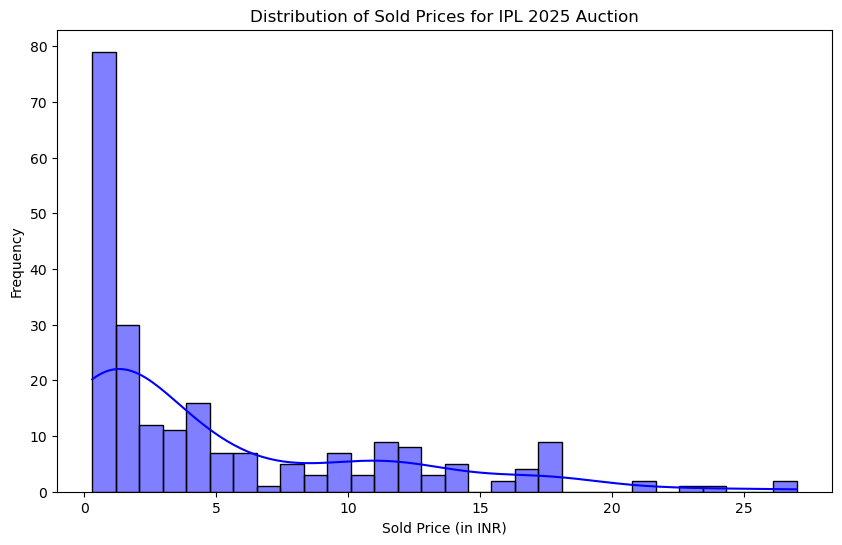

In [36]:
# Plot the distribution of sold prices
plt.figure(figsize=(10, 6))
sns.histplot(df["Sold"], kde=True, color='blue', bins=30)
plt.title('Distribution of Sold Prices for IPL 2025 Auction')
plt.xlabel('Sold Price (in INR)')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Average Sold Price by Player Type (Batsman, Bowler, All-rounder)

avg_price_by_type = df.groupby('Type')['Sold'].mean().reset_index()
avg_price_by_type

,Type,Sold
0,AR,4.608442
1,BAT,6.322794
2,BOWL,4.845122
3,WK,NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_17252\674146116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Sold', data=avg_price_by_type, palette='viridis')


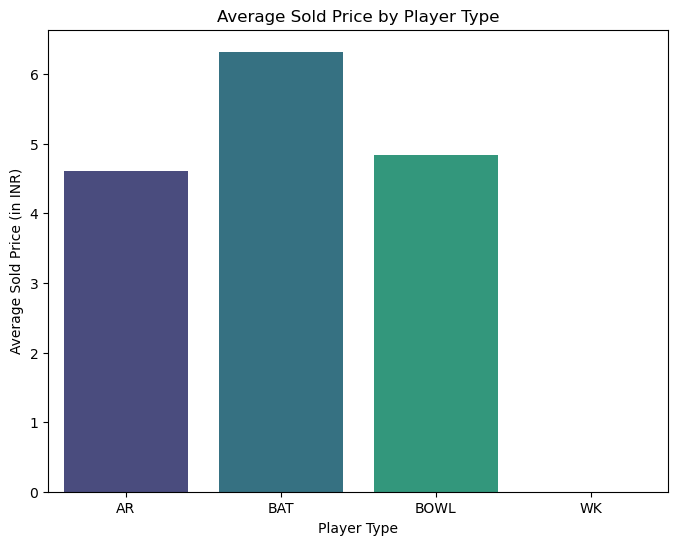

In [60]:
# Plot the average sold price by player type
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Sold', data=avg_price_by_type, palette='viridis')
plt.title('Average Sold Price by Player Type')
plt.xlabel('Player Type')
plt.ylabel('Average Sold Price (in INR)')
plt.show()

# Player Sold Price vs Base Price

In [64]:
# Create a new column to show the difference between sold and base price
df['price_difference'] = df['Sold'] - df['Base']
df['price_difference']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
617     NaN
618     NaN
619    10.5
620     NaN
621     NaN
Name: price_difference, Length: 621, dtype: float64

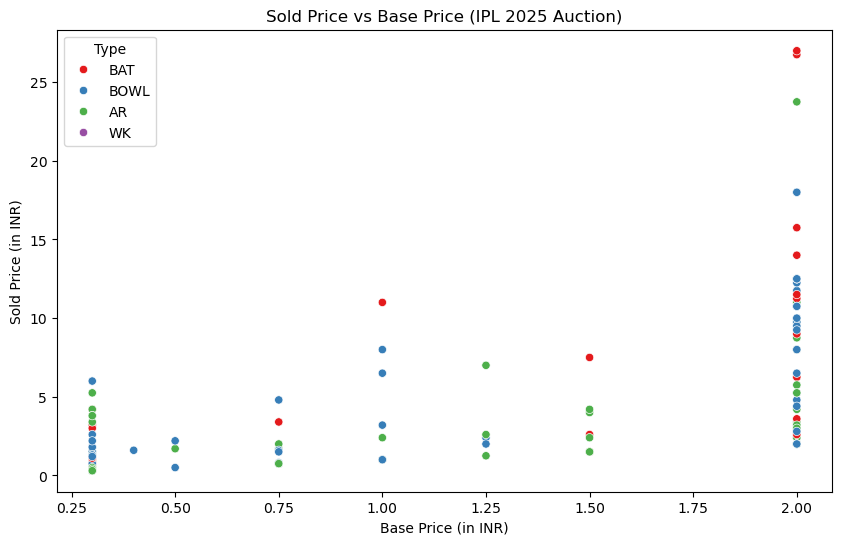

In [68]:
# Plot sold price vs base price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base', y='Sold', data=df, hue='Type', palette='Set1')
plt.title('Sold Price vs Base Price (IPL 2025 Auction)')
plt.xlabel('Base Price (in INR)')
plt.ylabel('Sold Price (in INR)')
plt.show()

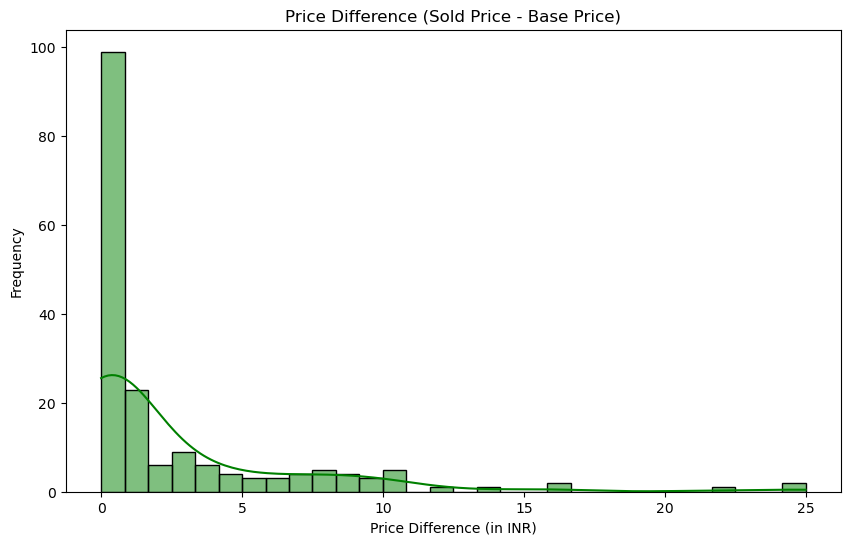

In [70]:
# Plot price difference
plt.figure(figsize=(10, 6))
sns.histplot(df['price_difference'], kde=True, color='green', bins=30)
plt.title('Price Difference (Sold Price - Base Price)')
plt.xlabel('Price Difference (in INR)')
plt.ylabel('Frequency')
plt.show()

# Top 10 Most Expensive Players

In [72]:
df

,Players,Team,Type,Base,Sold,price_difference
0,Virat Kohli,RCB,BAT,NaN,21.00,NaN
1,Rajat Patidar,RCB,BAT,NaN,11.00,NaN
2,Yash Dayal,RCB,BOWL,NaN,5.00,NaN
3,Jasprit Bumrah,MI,BOWL,NaN,18.00,NaN
4,Suryakumar Yadav,MI,BAT,NaN,16.35,NaN
...,...,...,...,...,...,...
617,Tripuresh Singh,-,AR,0.3,NaN,NaN
618,Vijay Yadav,-,AR,0.3,NaN,NaN
619,Jofra Archer,RR,BOWL,2.0,12.50,10.5
620,Saurabh Netravalkar,-,BOWL,0.3,NaN,NaN


In [135]:
# Get the top 10 most expensive players
top_10_expensive = df[['Players', 'Sold']].sort_values(by='Sold', ascending=False).head(10)



<BarContainer object of 10 artists>

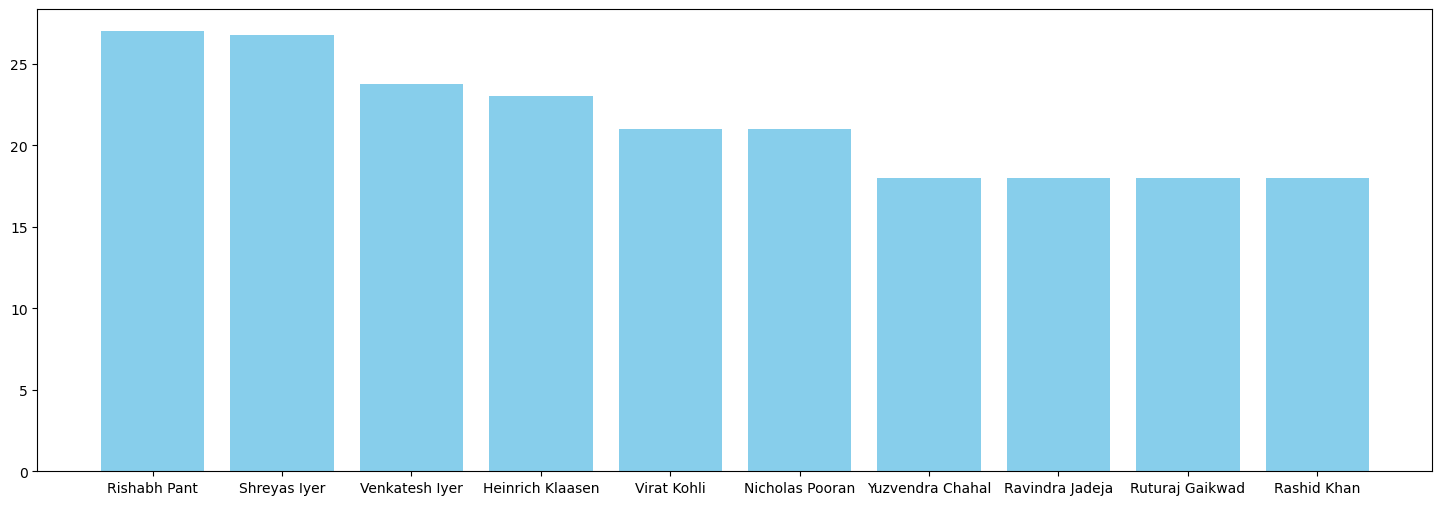

In [139]:
plt.figure(figsize=(18, 6))
plt.bar(top_10_expensive['Players'], top_10_expensive['Sold'], color='skyblue')


In [78]:


# Display the top 10 most expensive players
print(top_10_expensive)

             Players   Sold
48      Rishabh Pant  27.00
47      Shreyas Iyer  26.75
66    Venkatesh Iyer  23.75
8   Heinrich Klaasen  23.00
0        Virat Kohli  21.00
39   Nicholas Pooran  21.00
52  Yuzvendra Chahal  18.00
14   Ravindra Jadeja  18.00
13   Ruturaj Gaikwad  18.00
34       Rashid Khan  18.00


# Total Spending by Each Team


In [80]:
# Group by 'team' and calculate the total spending
team_spending = df.groupby('Team')['Sold'].sum().reset_index()

In [84]:
# Sort by total spending
team_spending = team_spending.sort_values(by='Sold', ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17252\155650393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sold', y='Team', data=team_spending, palette='Blues_d')


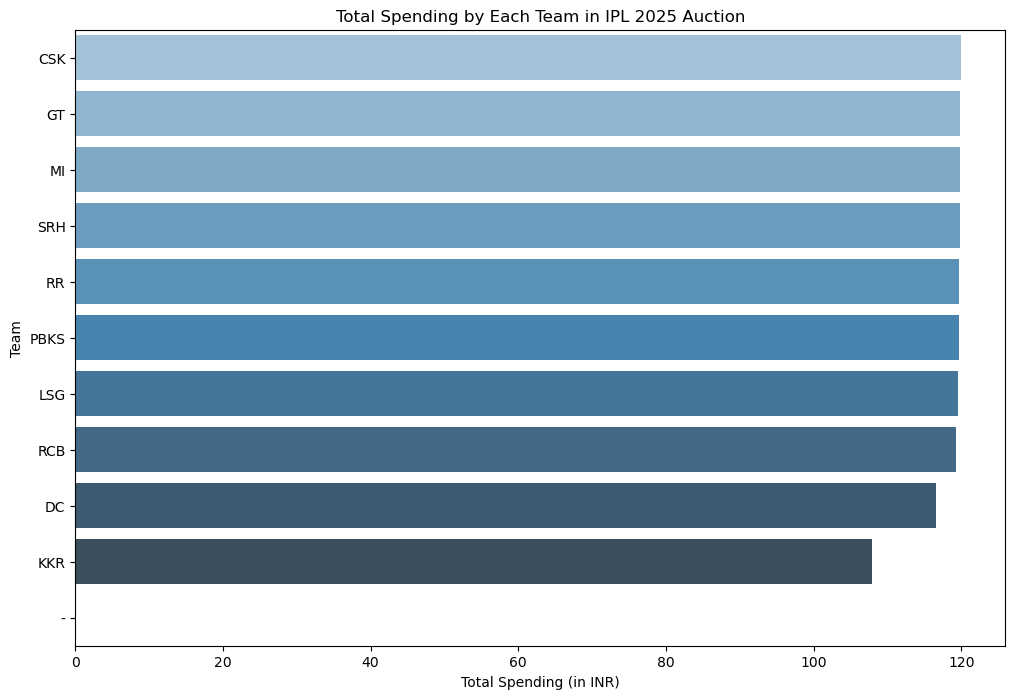

In [86]:
# Plot the total spending by team
plt.figure(figsize=(12, 8))
sns.barplot(x='Sold', y='Team', data=team_spending, palette='Blues_d')
plt.title('Total Spending by Each Team in IPL 2025 Auction')
plt.xlabel('Total Spending (in INR)')
plt.ylabel('Team')
plt.show()

In [88]:
top_spending_teams = team_spending.head(10)
print("Top 10 Spending Teams:")
print(top_spending_teams)

Top 10 Spending Teams:
    Team    Sold
1    CSK  119.95
3     GT  119.85
6     MI  119.80
10   SRH  119.80
9     RR  119.70
7   PBKS  119.65
5    LSG  119.60
8    RCB  119.25
2     DC  116.55
4    KKR  107.95


In [155]:
# Example list of colors for the top 10 teams
colors = ['Yellow', 'brown', 'blue', 'orange', 'purple', 'pink', 'cyan', 'red', 'black', 'violet']

<BarContainer object of 10 artists>

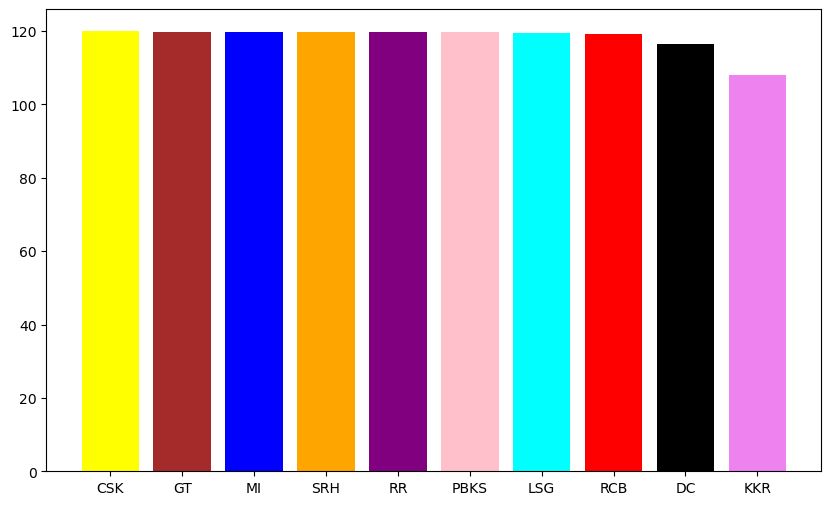

In [157]:
# Plot the top 10 spending teams as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_spending_teams['Team'], top_spending_teams['Sold'], color= colors)

In [162]:
df

,Players,Team,Type,Base,Sold,price_difference
0,Virat Kohli,RCB,BAT,NaN,21.00,NaN
1,Rajat Patidar,RCB,BAT,NaN,11.00,NaN
2,Yash Dayal,RCB,BOWL,NaN,5.00,NaN
3,Jasprit Bumrah,MI,BOWL,NaN,18.00,NaN
4,Suryakumar Yadav,MI,BAT,NaN,16.35,NaN
...,...,...,...,...,...,...
617,Tripuresh Singh,-,AR,0.3,NaN,NaN
618,Vijay Yadav,-,AR,0.3,NaN,NaN
619,Jofra Archer,RR,BOWL,2.0,12.50,10.5
620,Saurabh Netravalkar,-,BOWL,0.3,NaN,NaN


In [166]:
# Filter the dataset to include only batsmen
batsmen_df = df[df['Type'] == 'BAT']


In [168]:
# Group by 'team' and count the number of batsmen bought by each team
team_batsmen_count = batsmen_df.groupby('Team').size().reset_index(name='num_batsmen')

In [170]:
# Sort the results by the number of batsmen in descending order
team_batsmen_count = team_batsmen_count.sort_values(by='num_batsmen', ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17252\500819666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_batsmen', y='Team', data=team_batsmen_count, palette='viridis')


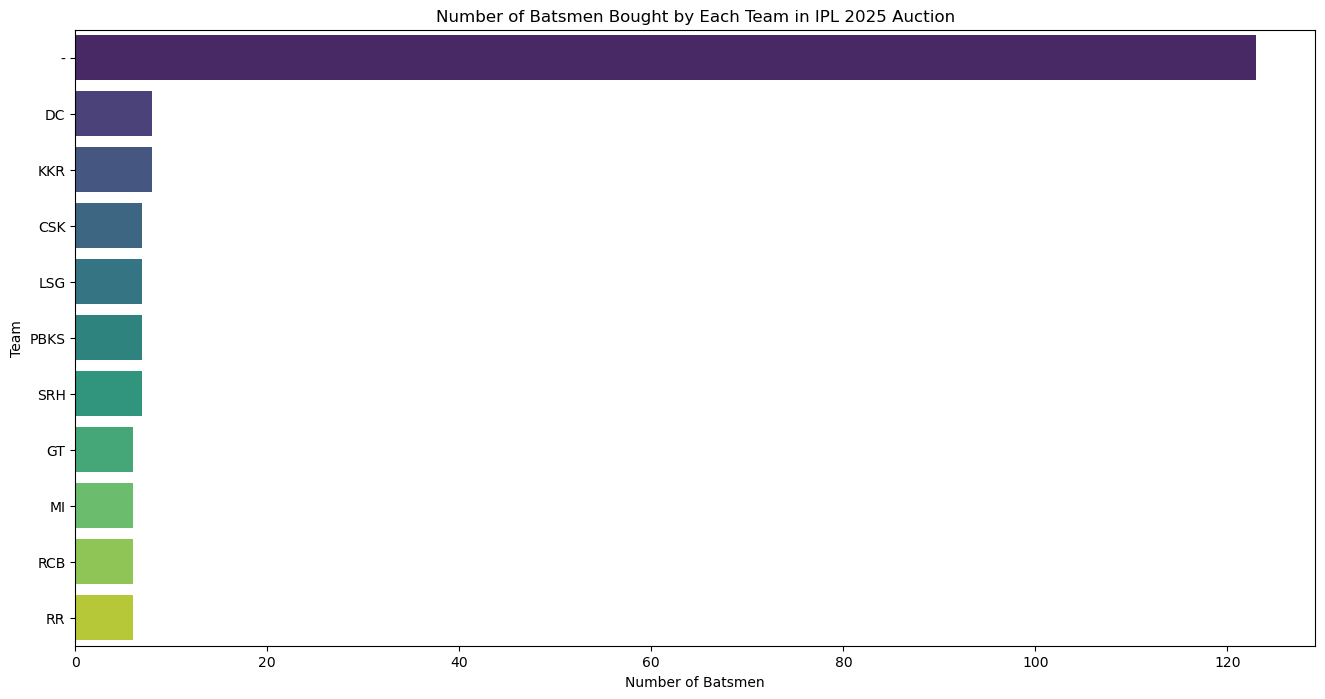

In [176]:
# Plot the number of batsmen bought by each team
plt.figure(figsize=(16, 8))
sns.barplot(x='num_batsmen', y='Team', data=team_batsmen_count, palette='viridis')
plt.title('Number of Batsmen Bought by Each Team in IPL 2025 Auction')
plt.xlabel('Number of Batsmen')
plt.ylabel('Team')
plt.show()

In [199]:
# Filter the dataset to include only batsmen
bowler_df = df[df['Type'] == 'BOWL']


In [201]:
team_bowler_count = bowler_df.groupby('Team').size().reset_index(name='num_bowler')

In [205]:
team_bowler_count = team_bowler_count.sort_values(by='num_bowler', ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17252\2454389758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_bowler', y='Team', data=team_bowler_count, palette='viridis')


<Axes: xlabel='num_bowler', ylabel='Team'>

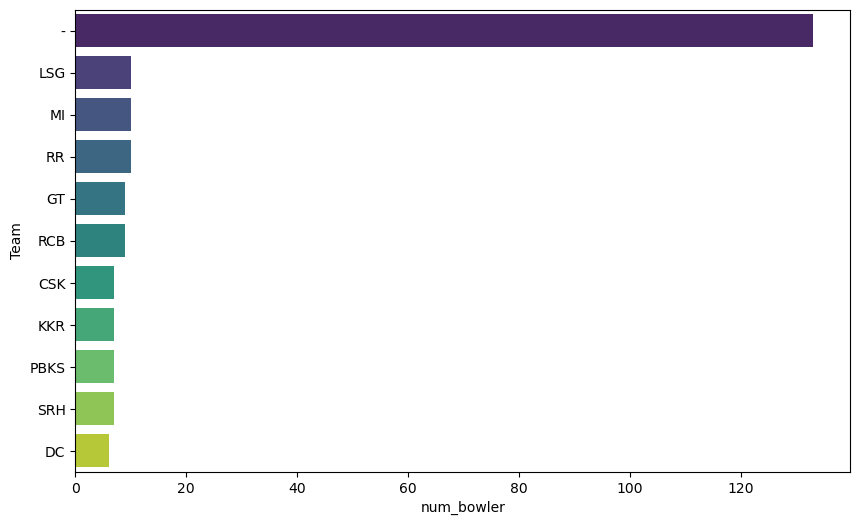

In [211]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num_bowler', y='Team', data=team_bowler_count, palette='viridis')



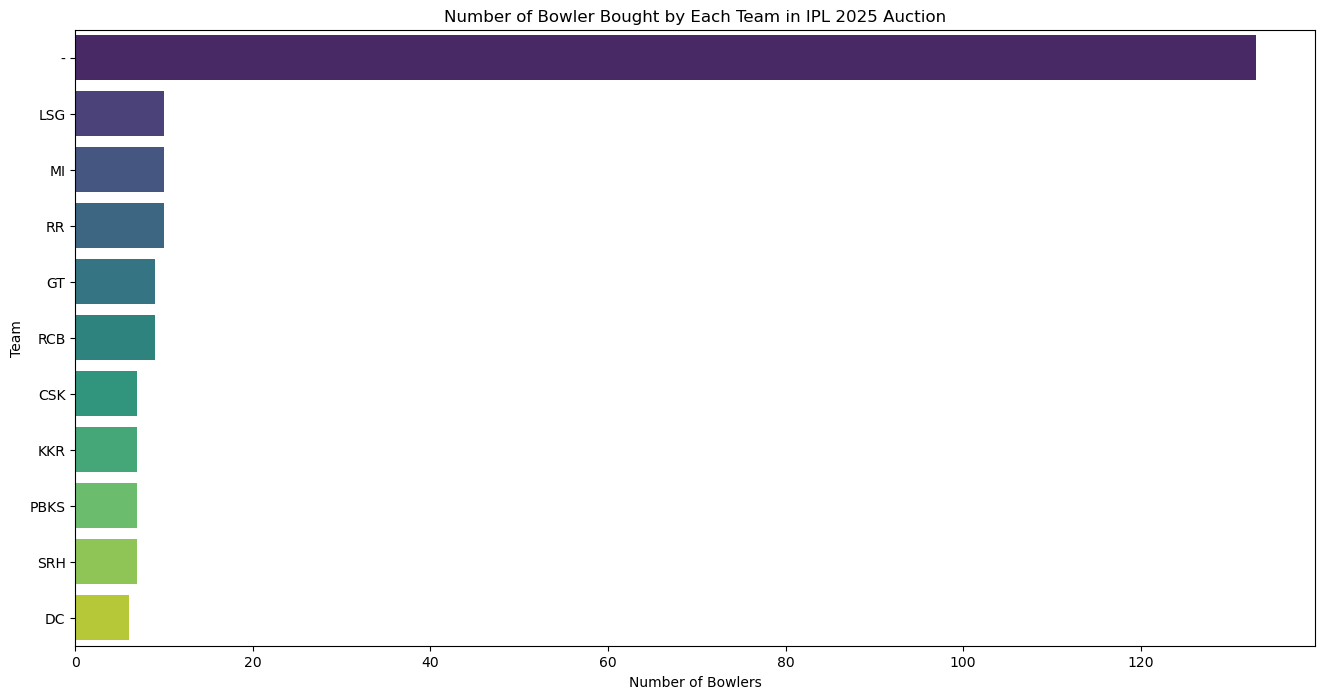

In [209]:
# Plot the number of batsmen bought by each team
plt.figure(figsize=(16, 8))
sns.barplot(x='num_bowler', y='Team', data=team_bowler_count, hue='Team', palette='viridis')
plt.title('Number of Bowler Bought by Each Team in IPL 2025 Auction')
plt.xlabel('Number of Bowlers')
plt.ylabel('Team')
plt.show()

In [ ]:
# Filter the dataset to include only batsmen
batsmen_df = df[df['type'] == 'Batsman']